x,y range: (120,) (120,)
X,Y maps: (120, 120) (120, 120)


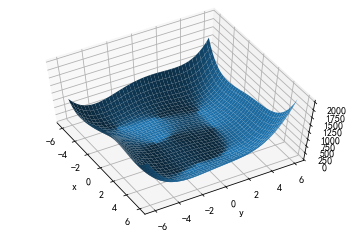

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib qt5
%matplotlib inline
def himmelblau(x):
    return (x[0]**2+x[1]-11)**2 +(x[0]+x[1]**2-7)**2
    #return  3*(1-x[0])**2*np.exp(-(x[0]**2)-(x[1]+1)**2)- 10*(x[0]/5 - x[0]**3 - x[1]**5)*np.exp(-x[0]**2-x[1]**2)- 1/3**np.exp(-(x[0]+1)**2 - x[1]**2)
x=np.arange(-6,6,0.1)
y=np.arange(-6,6,0.1)
print('x,y range:',x.shape,y.shape)
X,Y=np.meshgrid(x,y)
print('X,Y maps:',X.shape,Y.shape)
Z=himmelblau([X,Y])
fig=plt.figure('Himmelblau')
ax=fig.gca(projection='3d')
ax.plot_surface(X,Y,Z)
ax.view_init(60,-30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [5]:
import torch

def himmelblau(x):
    re=(x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2
    '''
       re=3*(1-x[0])**2*np.exp(-(x[0]**2)-(x[1]+1)**2)- 10*(x[0]/5 - x[0]**3 - x[1]**5)*np.exp(-x[0]**2-x[1]**2)- 1/3**np.exp(-(x[0]+1)**2 - x[1]**2)
    ''' 
    return re
  
   

In [6]:
# 初始设置为0,0.
x = torch.tensor([-4., 0.], requires_grad=True)
# 优化目标是找到使himmelblau函数值最小的坐标x[0],x[1]，
# 也就是x, y
# 这里是定义Adam优化器,指明优化目标是x,学习率是1e-3
optimizer = torch.optim.Adam([x], lr=1e-3)
 
for step in range(20000):
 # 每次计算出当前的函数值
     pred = himmelblau(x)
 # 当网络参量进行反馈时,梯度是被积累的而不是被替换掉,这里即每次将梯度设置为0
     optimizer.zero_grad()
 # 生成当前所在点函数值相关的梯度信息,这里即优化目标的梯度信息
     pred.backward()
 # 使用梯度信息更新优化目标的值,即更新x[0]和x[1]
     optimizer.step()
 # 每2000次输出一下当前情况
     if step % 2000 == 0:
         print("step={},x={},f(x)={}".format(step, x.tolist(), pred.item()))


step=0,x=[-3.999000072479248, -0.0009999999310821295],f(x)=146.0
step=2000,x=[-3.526559829711914, -2.5002429485321045],f(x)=19.4503231048584
step=4000,x=[-3.777446746826172, -3.2777843475341797],f(x)=0.0012130826944485307
step=6000,x=[-3.7793045043945312, -3.283174753189087],f(x)=5.636138666886836e-09
step=8000,x=[-3.779308319091797, -3.28318190574646],f(x)=7.248672773130238e-10
step=10000,x=[-3.7793095111846924, -3.28318452835083],f(x)=8.822098607197404e-11
step=12000,x=[-3.7793102264404297, -3.2831854820251465],f(x)=8.185452315956354e-12
step=14000,x=[-3.7793102264404297, -3.2831859588623047],f(x)=0.0
step=16000,x=[-3.7793102264404297, -3.2831859588623047],f(x)=0.0
step=18000,x=[-3.7793102264404297, -3.2831859588623047],f(x)=0.0
